
<span style="font-weight:bold; color:#4CAF50; font-size:28px;">
Pet Classifier: Cats vs. Dogs(TASK 3)</span>

<div style="font-family: Arial, sans-serif; text-align: left; background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <span style="font-weight: bold; color: #4CAF50; font-size: 20px;">Author: Usha rahul</span><br>
    <span style="font-weight: bold; color: #2196F3; font-size: 18px;">Date: 28/01/2025 </span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">company: CodeTech IT Solutions</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">inturn ID: CT0806HT</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Domain: Machine Learning</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Batch duration: december 30th 2024 to February 14th 2025</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Mentor name:Neela Santhosh Kumar</span>
</div>

<img src="C:\Users\user\Downloads\image.png" height="auto" width="1200px">



Overview:
This project focuses on training a deep learning model to classify images into two categories: cats and dogs. We are using a convolutional neural network (CNN), which is well-suited for image classification tasks due to its ability to learn spatial hierarchies of features from images.

Key steps involved in this process:

Data Preparation:

Images are organized into separate directories for training and testing. The training set is used to teach the model, and the test set is used for evaluation.
The images are resized to a fixed input size (150x150 pixels) to match the input requirements of the model.
Model Architecture:

The model used is a CNN, which includes several convolutional layers for feature extraction, followed by pooling layers for downsampling. Finally, fully connected layers are used for classification.
Image Preprocessing:

Each image is normalized by scaling pixel values to a range between 0 and 1.
A batch dimension is added to the image array to make it compatible with the model's input.
Model Training:

The model is trained using the training data, and validation is done using the test set. The training involves several epochs, where the model adjusts its internal parameters to reduce classification errors.
Prediction:

After the model is trained, it can predict whether an image contains a cat or a dog by outputting a class label based on the image content.
We visualize the input image and overlay the predicted label to provide a clear understanding of the model's decision-making process.

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset
train_dir = r'C:\Users\user\Desktop\image classification\train'
test_dir = r'C:\Users\user\Desktop\image classification\test'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rescaling for test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train data loader
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Test data loader
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important to preserve the order for testing
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 3 classes.


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing for training data (including augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to range [0, 1]
    rotation_range=40,  # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Random shear transformations
    zoom_range=0.2,  # Random zooming
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels after transformation
)

# Preprocessing for test data (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='binary',  # For binary classification (cat vs dog)
    shuffle=True
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important to keep the order for evaluation
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 3 classes.


In [45]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: use 'sigmoid'
])

# Compile the model
model.compile(
    loss='binary_crossentropy',  # Binary classification loss
    optimizer='adam',  # Adam optimizer
    metrics=['accuracy']
)

# Model summary
model.summary()


C:\Users\user\Documents\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 896ms/step - accuracy: 0.5127 - loss: 1.1108 - val_accuracy: 0.5469 - val_loss: 0.6885
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5938 - loss: 0.6808 - val_accuracy: 0.0000e+00 - val_loss: 0.8050
Epoch 3/10


C:\Users\user\Documents\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 813ms/step - accuracy: 0.4738 - loss: 0.6986 - val_accuracy: 0.5469 - val_loss: 0.6920
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5000 - loss: 0.7058 - val_accuracy: 0.0000e+00 - val_loss: 0.8161
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 850ms/step - accuracy: 0.5544 - loss: 0.6935 - val_accuracy: 0.4688 - val_loss: 0.6933
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5625 - loss: 0.6926 - val_accuracy: 1.0000 - val_loss: 0.6728
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 897ms/step - accuracy: 0.5300 - loss: 0.6908 - val_accuracy: 0.5469 - val_loss: 0.6882
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4688 - loss: 0.6937 - val_accuracy: 0.6667 - val_loss: 0.6860
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 815ms/step - accuracy: 0.5365 - loss: 0.6934 - val_accuracy: 0.4531 - val_loss: 0.6938
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5625 - loss: 0.6849 - val_accuracy: 0.4167 - val

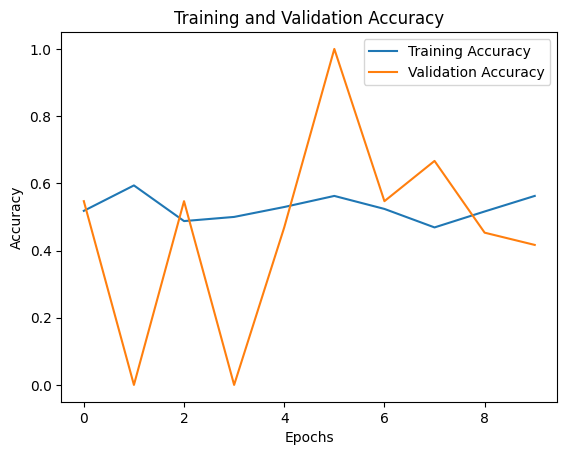

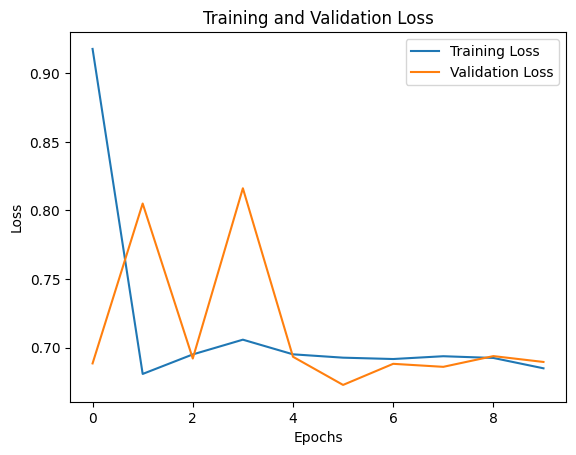

In [54]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [55]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.6276 - loss: 0.6885
Test Loss: 0.6901292204856873
Test Accuracy: 0.5428571701049805


In [65]:
model.save('cat_vs_dog_classifier.h5')


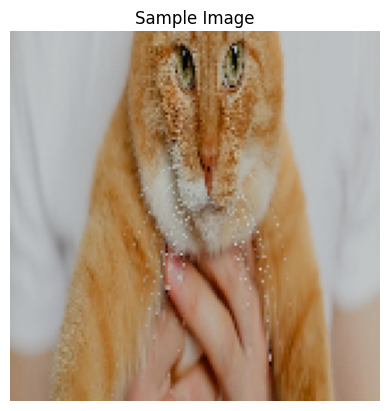

In [63]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to the image
img_path = r"C:\Users\user\Desktop\image classification\test\cats\cat_5.jpg"

# Load the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to match your model's input size

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.title("Sample Image")
plt.show()


In [69]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = r"C:\Users\user\Desktop\image classification\train\dogs\dog_45.jpg"  # Use raw string to handle backslashes
img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model input
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load your trained model (ensure correct path)
model_path = r"C:\path_to_your_model\model.h5"  # Update with the correct path to your saved model
from tensorflow.keras.models import load_model
model = load_model(model_path)

# Make a prediction
predictions = model.predict(img_array)

# Output prediction result
if predictions[0][0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
It's a dog!


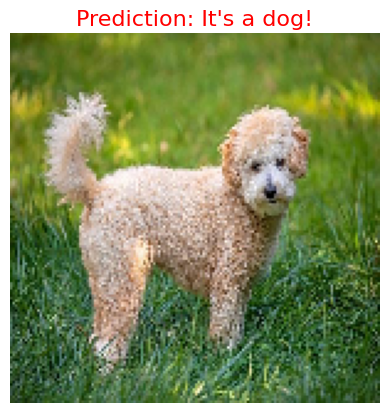

In [71]:
# Display the image with prediction result
plt.imshow(img)
plt.axis('off')

# Add text on the image (Prediction result)
prediction_text = "It's a dog!" if predictions[0][0] > 0.5 else "It's a cat!"
plt.title(f"Prediction: {prediction_text}", fontsize=16, color='red')

plt.show()


### Conclusion:

The model's performance on the test data can be summarized as follows:

- **Test Loss**: 0.6901
- **Test Accuracy**: 54.29%

The accuracy is about 54%, which indicates that the model is performing slightly better than random chance (which would be around 50% for a binary classification problem like "Cat vs. Dog"). However, the test loss of 0.6901 suggests that the model is still struggling to make accurate predictions.

### Insights:
- **Model Underperformance**: The accuracy of 54.29% is relatively low. This could be due to several factors, such as insufficient training, an imbalanced dataset, or the model architecture not being optimal.
- **Potential Improvements**: 
  - **Data Augmentation**: Applying more data augmentation techniques can help improve the model's generalization and prevent overfitting.
  - **Model Tuning**: Experimenting with different architectures or increasing the depth of the model might improve performance.
  - **Additional Epochs**: The model might benefit from additional training epochs to further optimize weights.
  - **Learning Rate Adjustments**: Fine-tuning the learning rate could lead to better convergence.

### Next Steps:
- **Model Optimization**: Try experimenting with more complex architectures or adding regularization techniques such as dropout to improve the model's generalization.
- **Data Augmentation**: Adding more diverse transformations (like rotations, flips, etc.) can help the model learn better representations.
- **Hyperparameter Tuning**: Adjusting learning rates, batch sizes, or optimizer settings may improve performance.

With further tuning and adjustments, this model could achieve better accuracy and robustness in predicting the class of an image as either a cat or a dog.